In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
import json
import pandas as pd
import numpy as np
from datasets import load_dataset

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir(os.path.dirname(os.getcwd()))

import debias_vsi_clean as dv

In [14]:
df = dv.get_vsi_with_scores()
df

Evaluating /storage/home/ellisbrown/workspace/test-set-training/data/ref_evals/bld_sims_3q_10k_blind.jsonl: 100%|██████████| 5130/5130 [00:00<00:00, 71554.45it/s]
Evaluating /storage/home/ellisbrown/workspace/test-set-training/data/ref_evals/blk_sims_3q_10k_blind.jsonl: 100%|██████████| 5130/5130 [00:00<00:00, 75466.23it/s]
Evaluating /storage/home/ellisbrown/workspace/test-set-training/data/ref_evals/cambrian-s.jsonl: 100%|██████████| 5130/5130 [00:00<00:00, 33509.91it/s]
Evaluating /storage/home/ellisbrown/workspace/test-set-training/data/ref_evals/cambrian-s_blind.jsonl: 100%|██████████| 5130/5130 [00:00<00:00, 75933.89it/s]
Evaluating /storage/home/ellisbrown/workspace/test-set-training/data/ref_evals/gemini-1.5_pro.jsonl: 100%|██████████| 5156/5156 [00:00<00:00, 67750.31it/s]
Evaluating /storage/home/ellisbrown/workspace/test-set-training/data/ref_evals/llava_vid_7b.jsonl: 100%|██████████| 5156/5156 [00:00<00:00, 68542.68it/s]
Evaluating /storage/home/ellisbrown/workspace/test-set

Loaded 5130 files. Loading VSI-Bench...


,id,dataset,scene_name,question_type,question,ground_truth,options,bld_sims_3q_10k_blind,blk_sims_3q_10k_blind,cambrian-s,...,rgb_sims_3q_25k,rgb_sims_3q_25k_blind,rgb_sims_manV2_5k,rgb_sims_manV2_5k_blind,vsi_train_10k,vsi_train_10k_blind,vsi_train_50k,vsi_train_50k_blind,vsi_train_5k,vsi_train_5k_blind
0,0,arkitscenes,41069025,object_counting,How many table(s) are in this room?,4,None,0.0,0.0,0.1,...,0.1,0.0,0.1,0.0,0.1,0.1,0.1,0.1,0.1,0.1
1,1,arkitscenes,41069025,object_counting,How many chair(s) are in this room?,2,None,0.1,0.1,1.0,...,0.1,0.1,0.1,0.1,1.0,1.0,1.0,1.0,1.0,1.0
2,2,arkitscenes,41069043,object_counting,How many table(s) are in this room?,2,None,0.1,0.1,1.0,...,1.0,0.1,1.0,0.1,1.0,1.0,1.0,1.0,1.0,1.0
3,3,arkitscenes,41125700,object_counting,How many sofa(s) are in this room?,2,None,0.1,0.1,1.0,...,0.1,0.1,0.1,0.1,1.0,1.0,1.0,1.0,1.0,1.0
4,4,arkitscenes,41125700,object_counting,How many table(s) are in this room?,3,None,0.0,0.0,0.4,...,0.4,0.0,0.4,0.0,0.4,0.4,0.4,0.4,0.4,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5125,5151,scannet,scene0196_00,route_planning,You are a robot beginning at the trash bin nea...,C,"[A. Turn Right, Turn Left, B. Turn Right, Turn...",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5126,5152,scannet,scene0378_01,route_planning,You are a robot beginning at the door and faci...,A,"[A. Turn Left, Turn Left, Turn Left, B. Turn L...",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5127,5153,arkitscenes,47331654,route_planning,You are a robot beginning at the heater and fa...,D,"[A. Turn Left, Turn Right, B. Turn Back, Turn ...",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5128,5154,arkitscenes,42445026,route_planning,You are a robot beginning at the doorframe and...,C,"[A. Turn Left, B. Turn Back, C. Turn Right]",1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
budgets = {
    "object_size_estimation": 600,
    "object_abs_distance": 400,
    "object_rel_distance": 400,
    "obj_appearance_order": 300,
    "object_counting": 314,
    # "object_rel_direction_medium": 324,
    # "object_rel_direction_hard": 257,
    # "object_rel_direction_easy": 5,
    "object_rel_direction": 324 + 257 + 5,
    "room_size_estimation": 88,
    "route_planning": 80,
}

In [16]:
ids_obj_size = dv.filter_object_size_estimation(df, budget=budgets["object_size_estimation"])
ids_abs_distance = dv.filter_object_abs_distance(df, budget=budgets["object_abs_distance"])
ids_rel_distance = dv.filter_object_rel_distance(df, budget=budgets["object_rel_distance"])
ids_obj_app_order = dv.filter_obj_appearance_order(df, budget=budgets["obj_appearance_order"])
ids_obj_count = dv.filter_object_counting(df, budget=budgets["object_counting"])
ids_rel_dir = dv.filter_object_rel_direction(df, budget=budgets["object_rel_direction"])
ids_room_size = dv.filter_room_size_estimation(df, budget=budgets["room_size_estimation"])
ids_route_planning = dv.filter_route_planning(df, budget=budgets["route_planning"])

ids_map = {
    "object_size_estimation": ids_obj_size,
    "object_abs_distance": ids_abs_distance,
    "object_rel_distance": ids_rel_distance,
    "obj_appearance_order": ids_obj_app_order,
    "object_counting": ids_obj_count,
    "object_rel_direction": ids_rel_dir,
    "room_size_estimation": ids_room_size,
    "route_planning": ids_route_planning,
}
all_ids = set()
for k, v in ids_map.items():
    all_ids = all_ids.union(set(v))
    # print(f"Number of ids removed for {k}: {len(v)}")
    n_removed = len(v)
    n_orig = len(df[df["question_type"].str.startswith(k)])
    n_remaining = n_orig - len(v)
    print(f"{n_removed} / {n_orig} ({n_removed/n_orig * 100:.2f}%) of {k} removed{' ' * (25 - len(k))}\t => {n_remaining} / {n_orig} ({n_remaining/n_orig * 100:.2f}%) remaining")

print("="*50)
print(f"Number of ids removed: {len(all_ids)} / {len(df)} ({len(all_ids)/len(df) * 100:.2f}%)")
print(f"Number of ids remaining: {len(df) - len(all_ids)} / {len(df)} ({(len(df) - len(all_ids))/len(df) * 100:.2f}%)")
print("="*50)

deb_df = df.loc[~df["id"].isin(all_ids)]
removed_df = df.loc[df["id"].isin(all_ids)]

600 / 953 (62.96%) of object_size_estimation removed   	 => 353 / 953 (37.04%) remaining
400 / 834 (47.96%) of object_abs_distance removed      	 => 434 / 834 (52.04%) remaining
400 / 710 (56.34%) of object_rel_distance removed      	 => 310 / 710 (43.66%) remaining
300 / 618 (48.54%) of obj_appearance_order removed     	 => 318 / 618 (51.46%) remaining
314 / 565 (55.58%) of object_counting removed          	 => 251 / 565 (44.42%) remaining
586 / 968 (60.54%) of object_rel_direction removed     	 => 382 / 968 (39.46%) remaining
88 / 288 (30.56%) of room_size_estimation removed     	 => 200 / 288 (69.44%) remaining
80 / 194 (41.24%) of route_planning removed           	 => 114 / 194 (58.76%) remaining
Number of ids removed: 2768 / 5130 (53.96%)
Number of ids remaining: 2362 / 5130 (46.04%)


In [17]:
rem_scores = dv.evaluate_models(removed_df).T["overall"]
deb_scores = dv.evaluate_models(deb_df).T["overall"]
orig_scores = dv.evaluate_models(df).T["overall"]
diff_scores = deb_scores - orig_scores

# combine the series into a dataframe
scores_df = pd.DataFrame({
    "Removed": rem_scores,
    "Original": orig_scores,
    "Debiased": deb_scores,
    "Difference": diff_scores
})
scores_df = scores_df.reset_index().sort_values(by="Difference", ascending=True)
scores_df = scores_df.rename(columns={"index": "Model"})
print("Overall scores for each model:")
scores_df

Overall scores for each model:


/storage/home/ellisbrown/workspace/test-set-training/debias_vsi_clean.py:218: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  lambda x: pd.Series({model: x[model].mean() for model in model_columns})
/storage/home/ellisbrown/workspace/test-set-training/debias_vsi_clean.py:218: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  lambda x: pd.Series({model: x[model].mean() for model in model_columns})
/storage/home/ellisbrown/w

,Model,Removed,Original,Debiased,Difference
3,cambrian-s_blind,59.281069,46.857700,32.298899,-14.558801
17,vsi_train_50k_blind,57.066474,45.998051,33.027096,-12.970955
15,vsi_train_10k_blind,55.513006,44.692008,32.011008,-12.681000
19,vsi_train_5k_blind,54.906069,44.729045,32.802710,-11.926335
18,vsi_train_5k,62.658960,54.972710,45.965284,-9.007426
14,vsi_train_10k,64.219653,57.052632,48.653683,-8.398948
12,rgb_sims_manV2_5k,50.520231,43.730994,35.774767,-7.956227
2,cambrian-s,72.655347,66.054581,58.319221,-7.735360
13,rgb_sims_manV2_5k_blind,37.850434,31.341131,23.712955,-7.628175
16,vsi_train_50k,67.825145,61.506823,54.102456,-7.404367


/storage/home/ellisbrown/workspace/test-set-training/debias_vsi_clean.py:218: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  lambda x: pd.Series({model: x[model].mean() for model in model_columns})


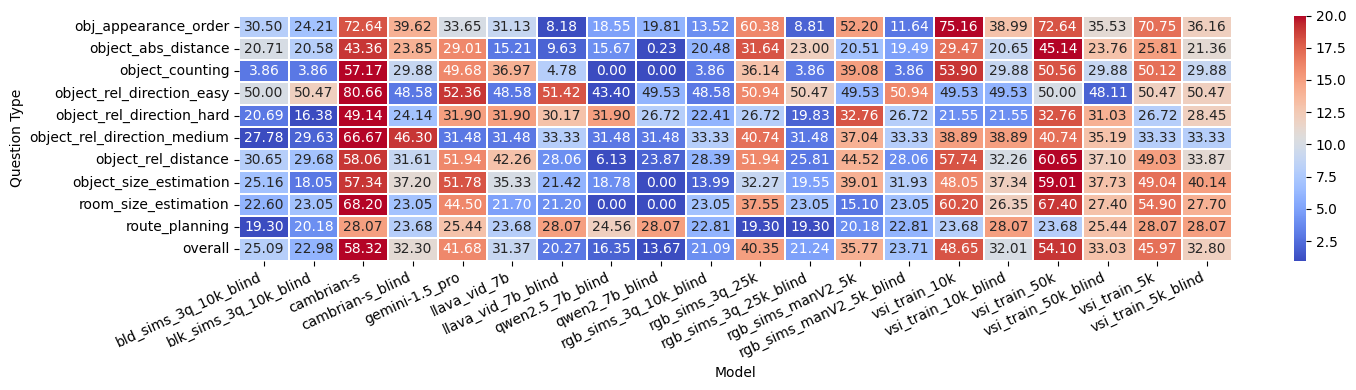

In [18]:
dv.visualize_model_scores(deb_df);

In [19]:
# ids_map # q : ids
for q, ids in ids_map.items():
    print(f"Question: {q}")
    removed_qdf = df.loc[df["id"].isin(ids)]
    quetion_types = removed_qdf["question_type"].value_counts()
    print(f"Question types: {quetion_types}")
    print("="*50, "\n")

Question: object_size_estimation
Question types: question_type
object_size_estimation    600
Name: count, dtype: int64

Question: object_abs_distance
Question types: question_type
object_abs_distance    400
Name: count, dtype: int64

Question: object_rel_distance
Question types: question_type
object_rel_distance    400
Name: count, dtype: int64

Question: obj_appearance_order
Question types: question_type
obj_appearance_order    300
Name: count, dtype: int64

Question: object_counting
Question types: question_type
object_counting    314
Name: count, dtype: int64

Question: object_rel_direction
Question types: question_type
object_rel_direction_medium    324
object_rel_direction_hard      257
object_rel_direction_easy        5
Name: count, dtype: int64

Question: room_size_estimation
Question types: question_type
room_size_estimation    88
Name: count, dtype: int64

Question: route_planning
Question types: question_type
route_planning    80
Name: count, dtype: int64



In [20]:
df["id"].nunique()

5130

In [21]:
from collections import Counter

# Flatten the lists in ids_map.values() and count occurrences
flattened_ids = [id for ids in ids_map.values() for id in ids]
value_counts = Counter(flattened_ids)

# Convert to a pandas Series for better visualization
value_counts_series = pd.Series(value_counts).sort_values(ascending=False)
value_counts_series

5136    1
439     1
446     1
293     1
226     1
       ..
172     1
2222    1
203     1
2364    1
529     1
Length: 2768, dtype: int64

In [12]:
# save the removed ids to a txt file
with open("data/removed_ids.txt", "w") as f:
    for id in all_ids:
        f.write(f"{id}\n")

In [13]:
# # ids_map {q : [ids]}
# # make a df w/ columns question, id

# ids_df = pd.DataFrame([(q, id) for q, ids in ids_map.items() for id in ids], columns=["question", "id"])
# ids_df.to_csv("data/removed_ids.csv", index=False)
# ids_df

In [14]:
list(all_ids)

[1,
 2,
 3,
 4,
 5,
 7,
 8,
 9,
 10,
 13,
 14,
 15,
 16,
 20,
 21,
 22,
 23,
 24,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 39,
 41,
 43,
 44,
 45,
 46,
 47,
 48,
 50,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 69,
 70,
 72,
 73,
 74,
 75,
 77,
 78,
 79,
 81,
 82,
 83,
 84,
 86,
 89,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 100,
 102,
 103,
 105,
 106,
 107,
 108,
 109,
 111,
 115,
 116,
 119,
 120,
 122,
 123,
 124,
 125,
 126,
 127,
 129,
 130,
 131,
 132,
 133,
 135,
 136,
 139,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 159,
 160,
 161,
 162,
 164,
 165,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 181,
 184,
 185,
 187,
 188,
 190,
 191,
 192,
 193,
 194,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 213,
 214,
 215,
 216,
 218,
 219,
 222,
 224,
 226,
 228,
 229,
 231,
 232,
 233,
 234,
 236,
 237,
 238,
 24